<a href="https://colab.research.google.com/github/aishwaryapatle/LGMVIP-DataScience/blob/main/Beginner/TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> # **LGM VIRTUAL INTERNSHIP PROGRAM 2021**



**Beginner Level TASK 01 - Iris Flowers Classification ML Project**


**Domain: DATA SCIENCE**

**AUTHOR - Aishwarya PATLE**



> Importing Libraries



In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



> Reading the data from csv file



In [2]:
# Reading Iris dataset from csv file using pandas
data = pd.read_csv('Iris.csv')

In [3]:
# Retrieving first 5 rows
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Checking for last 5 rows
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# Checking the shape of the dataset.. 
data.shape

(150, 5)

In [6]:
# Checking the size of whole dataset
data.size

750

In [7]:
# Checking datatypes for all features
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [8]:
# Basic information regarding data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# Checking is there any null values present or not
data.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [10]:
# Checking for duplicate values
data[data.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [11]:
# Describe function gives the basic numerical info about data for each numeric feature..
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
# Data points count value for each species
data['species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64



# **Data Visualization**



> **Univariate Analysis**

> Histogram

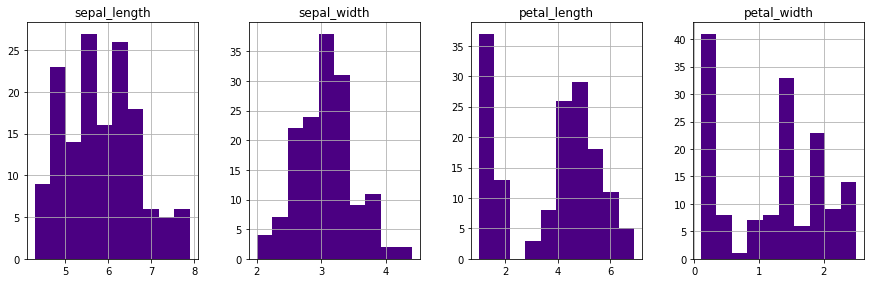

In [13]:
# Histogram
data.hist(figsize=(15,10), layout=(2,4), color="indigo");



> Box Plot



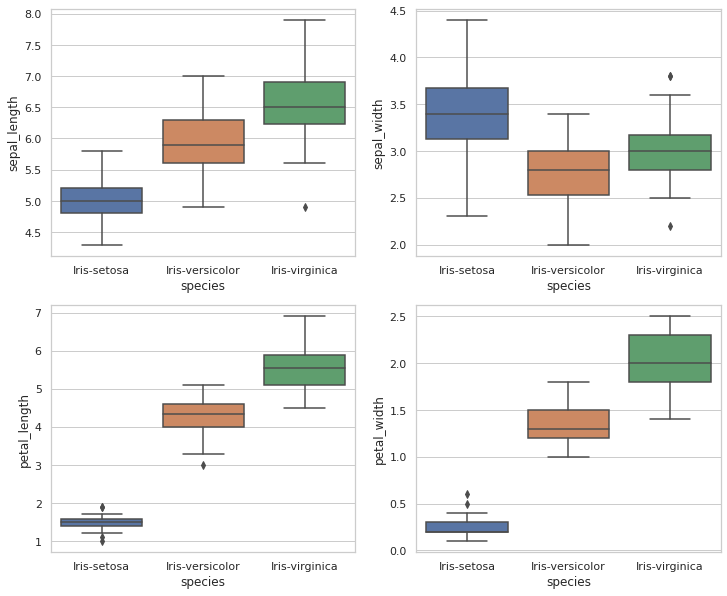

In [14]:
# Box Plot
sns.set(style="whitegrid")
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='species',y='sepal_length',data=data)
plt.subplot(2,2,2)
sns.boxplot(x='species',y='sepal_width',data=data)
plt.subplot(2,2,3)
sns.boxplot(x='species',y='petal_length',data=data)
plt.subplot(2,2,4)
sns.boxplot(x='species',y='petal_width',data=data)
plt.show()



> Violin Plot



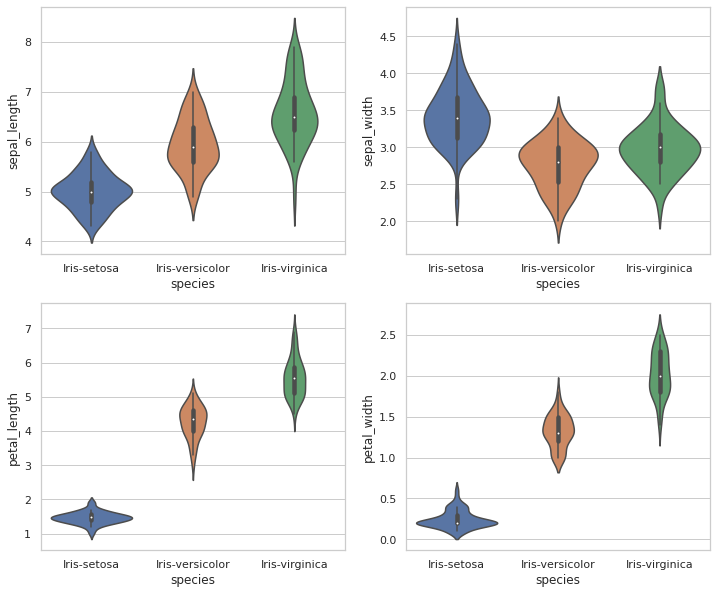

In [15]:
# Violin Plot
sns.set(style="whitegrid")
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='sepal_length',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='sepal_width',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='petal_length',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='petal_width',data=data)
plt.show()

> Scatter Plot

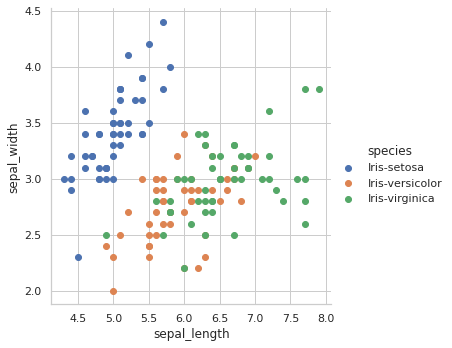

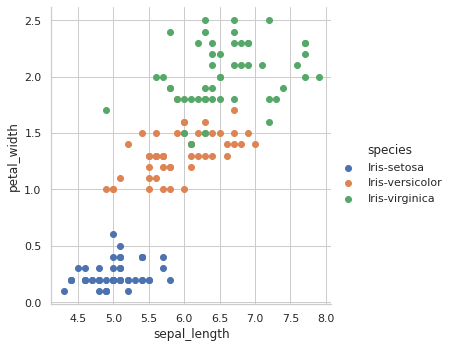

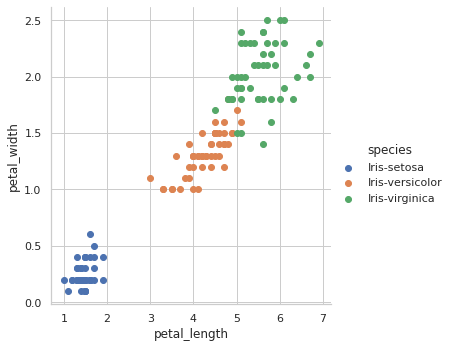

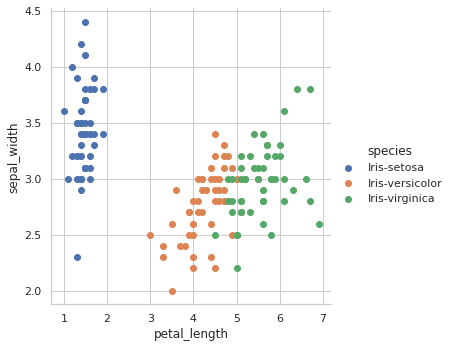

In [16]:
# Scatter Plot
sns.FacetGrid(data, hue="species", height=5).map(plt.scatter,'sepal_length','sepal_width').add_legend()
sns.FacetGrid(data, hue="species", height=5).map(plt.scatter,'sepal_length','petal_width').add_legend()
sns.FacetGrid(data, hue="species", height=5).map(plt.scatter,'petal_length','petal_width').add_legend()
sns.FacetGrid(data, hue="species", height=5).map(plt.scatter,'petal_length','sepal_width').add_legend()

> **Multivariate Analysis**

> Pair Plot

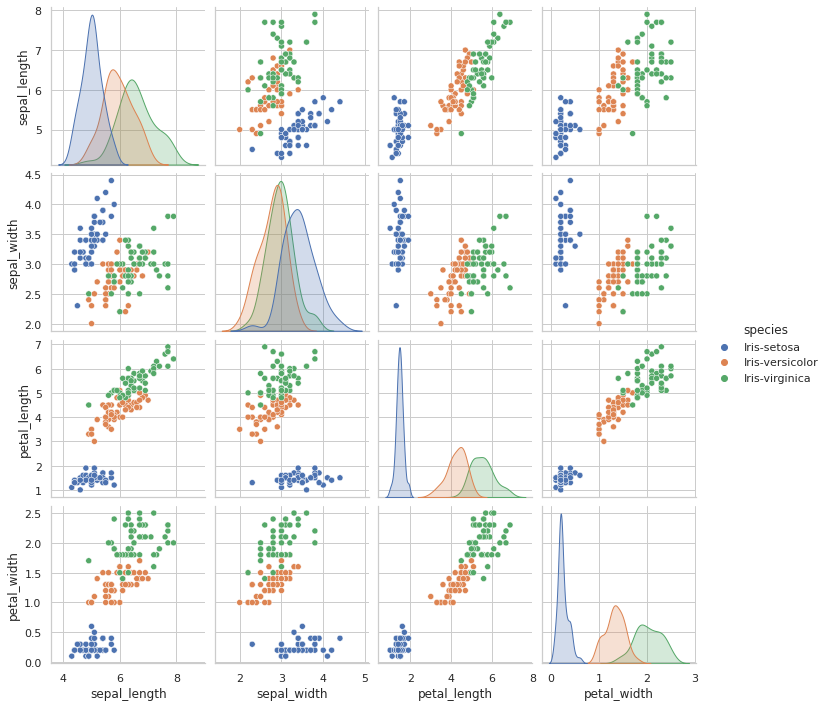

In [17]:
# Pair plot gives the realtionship b/w all features distribution with each other..
sns.pairplot(data=data, hue='species')
plt.show()

> Correlational Matrix

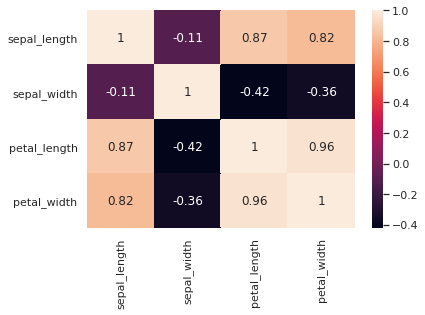

In [18]:
# Correational matrix
sns.heatmap(data.corr(), annot=True);

> **Preprocessing the data**

In [19]:
# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]

# y = target values, last column of the data frame
y = data.iloc[:, -1]

In [20]:
#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

> **Logistic Regression**

In [21]:
#Train the model
model = LogisticRegression()
model.fit(x_train, y_train) 

#Test the model
predictions = model.predict(x_test)
print("\nPrediction :\n")
print(predictions)

#Check precision, recall, f1-score
print("\nClassification Report :\n")
print( classification_report(y_test, predictions))

print("\nAccuracy score of Logistic Regression is :",accuracy_score(y_test, predictions))


Prediction :

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']

Classification Report :

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Accuracy score of Logistic Regression is : 1.0


> **K-Nearest Neighbours**

In [23]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))

# Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

# Accuracy score
print('\nAccuracy score of K-Nearest Neighbours is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy score of K-Nearest Neighbours is 1.0


> **Support Vector Machine (SVM)**

In [24]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))

# Confusion matrix
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

# Accuracy score
from sklearn.metrics import accuracy_score
print('\nAccuracy score of SVM is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy score of SVM is 1.0


> **Thank you!**